Pictures are taken from here https://github.com/Dyakonov/DL/blob/master/2020/DL2020_052vae_06n.pdf

# Disadvantages of standard AutoEncoders

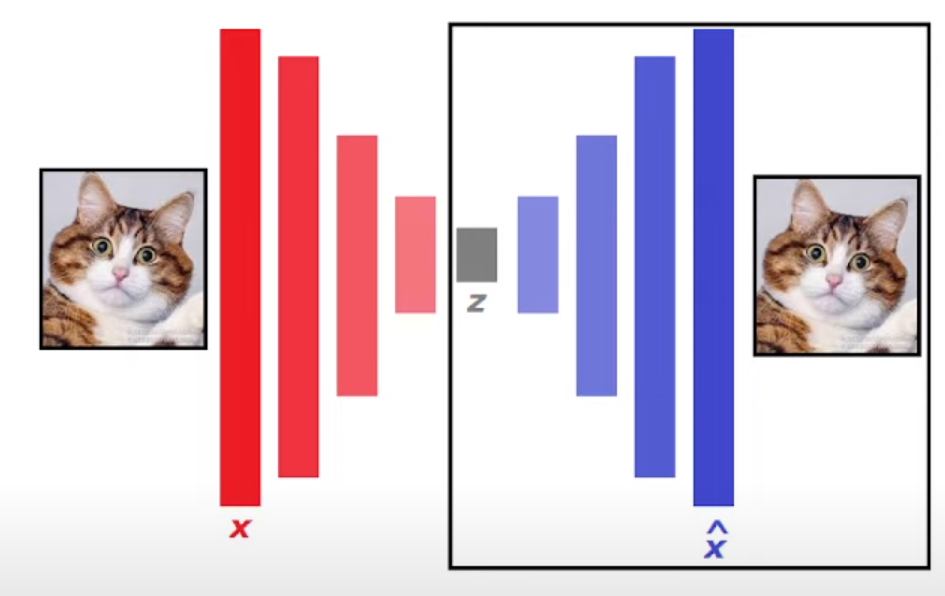

- latent space is not compact/sparse, i.e. if we send some request to AE trained to return cat images, we are not guaranteed to recieve some meaningful result at every request; cat image may be recieved only as response for some specific request and all the rest requests would return noise; but we want *every* request to return meaningful response and this response must be new (not seen in training dataset), so latent space must be compact/dense
- space is not noise resistant, i.e. cat image generated from point that is located between two another points of some distribution must be average of images generated from these points, not random image

# Variational AutoEncoders (VAE)

- latent space most have some distribution (like normal)
- image is encoded not as point in multidimensional space (i.e. vector with this point coordinates) but as some small distribution in this space 

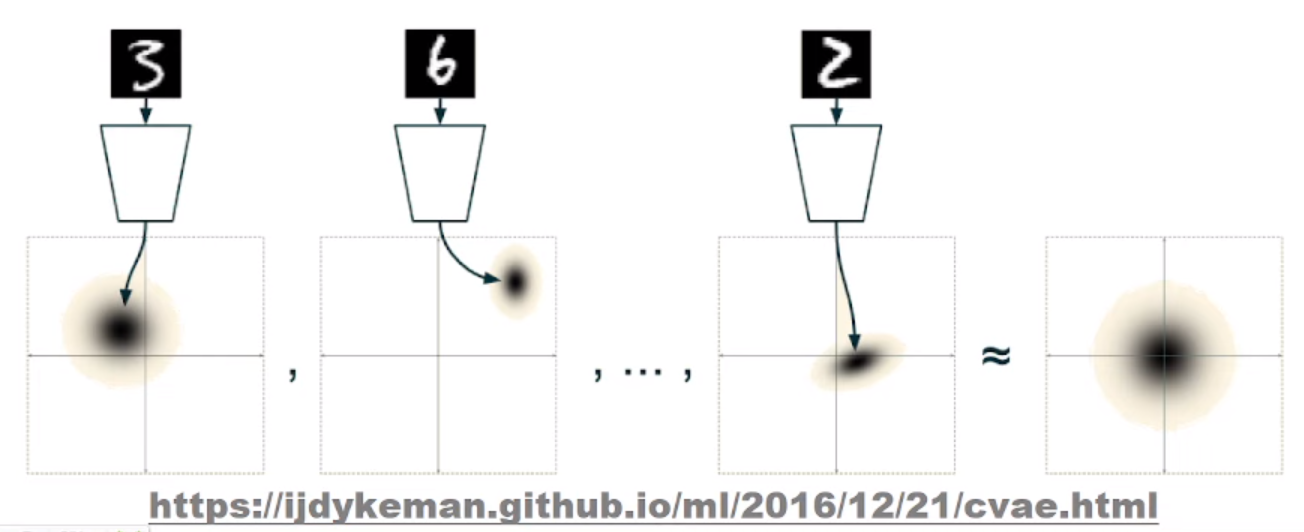

### How to do this?

- train autoencoder to make hidden variables ~ some distribution (e.g. z ~ norm(0, I)
- send to decoder not output of the encoder (vector) but some distribution with the encoder output in the center

Left - simple AE, right - VAE

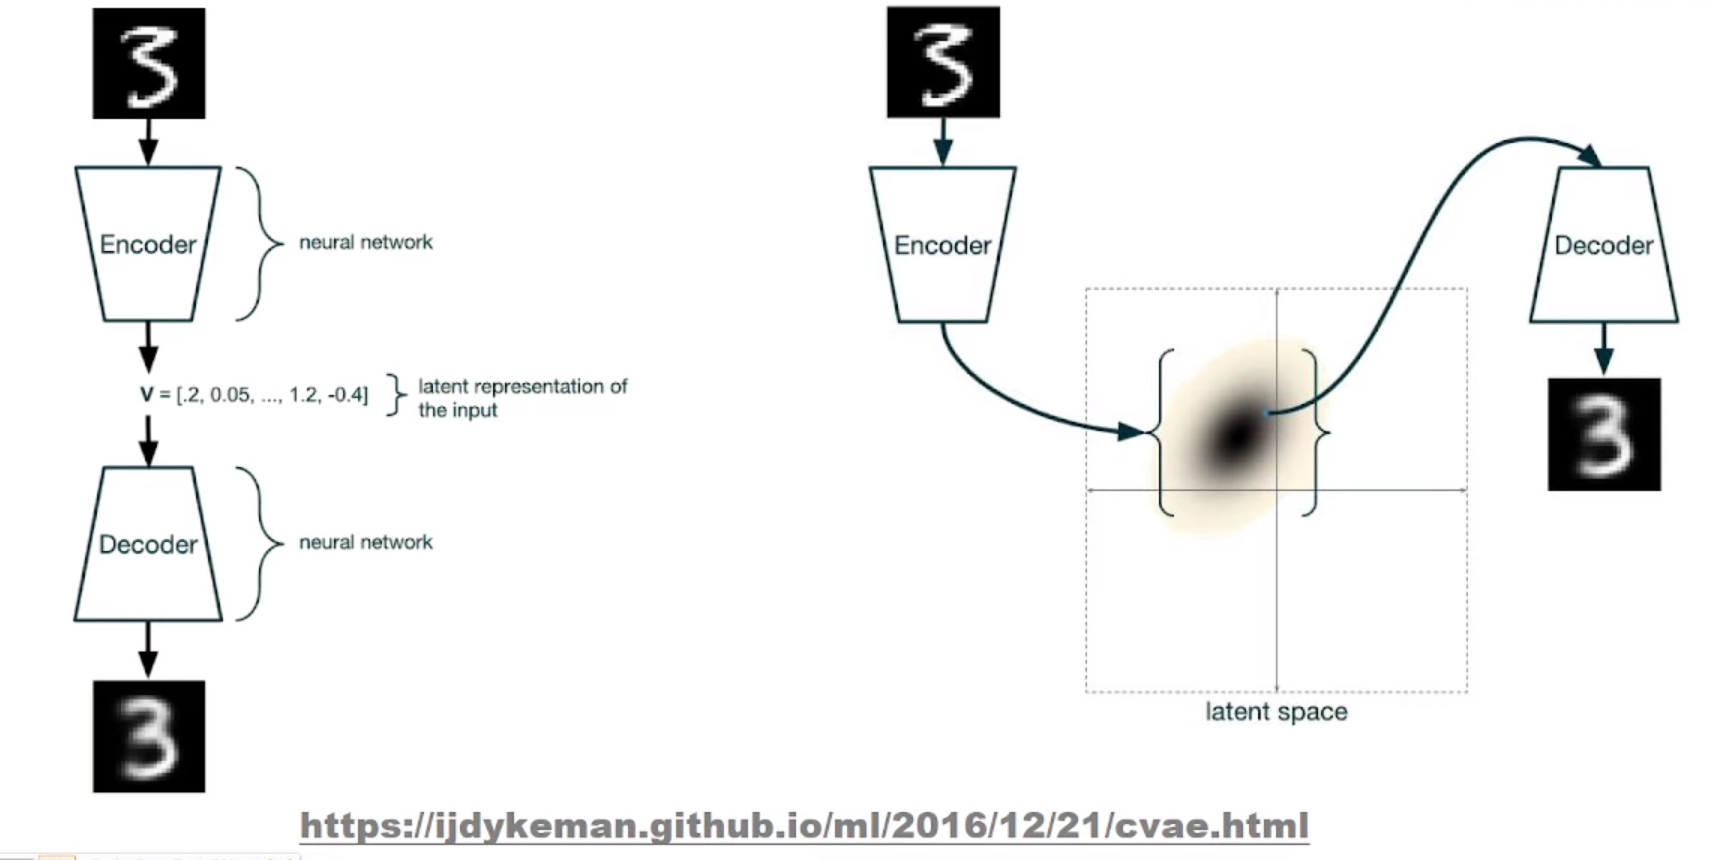

Use some hidden variable z to generate p<sub>$\theta$</sub>(x) from p<sub>$\theta$</sub>(z):

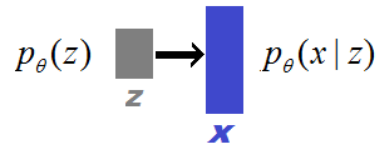

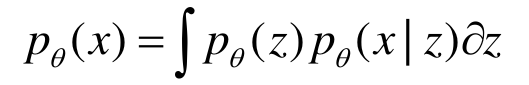

Where p<sub>$\theta$</sub>(z) ~ normal, p<sub>$\theta$</sub>(x|z) - some complex distribution (because image/audio/text is generated from vector by some probabilistic decoder (i.e. NN)).

But we can't compute p<sub>$\theta$</sub>(x|z) - integration is impossible

### Solution:

Besides probabilistic decoder we make probabilistic encoder q<sub>$\phi$</sub>(z|x), this let us to gain estimation of the likelihood

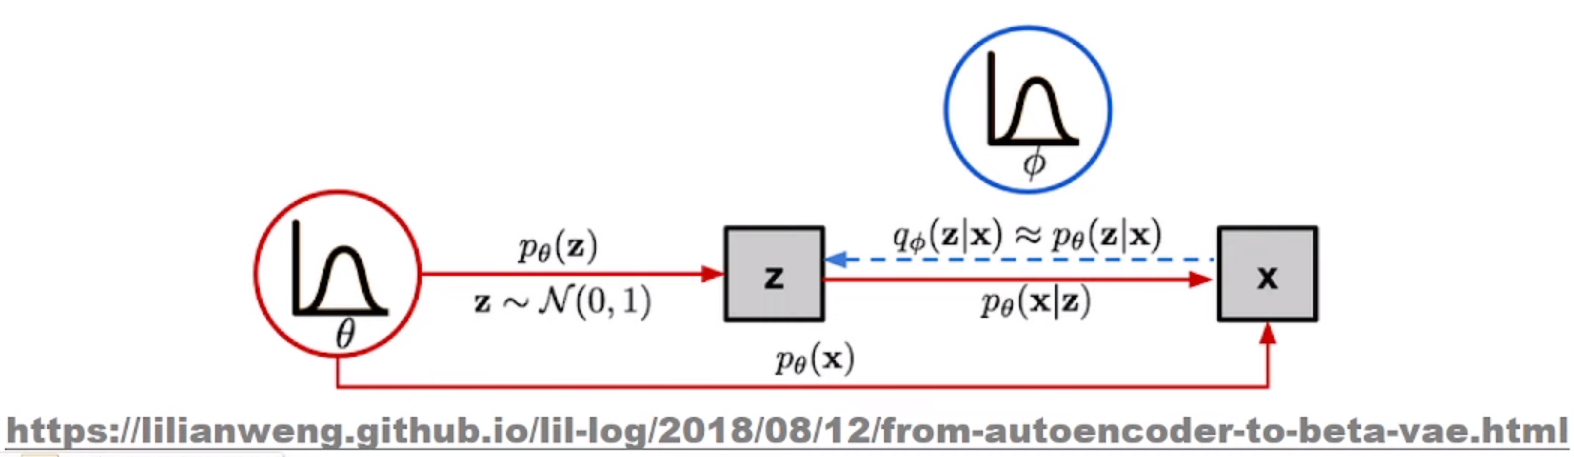

We want to find parameter $\theta$ that maximizes log p<sub>$\theta$</sub>(x). By using some math we can rewrite log p<sub>$\theta$</sub>(x) as:

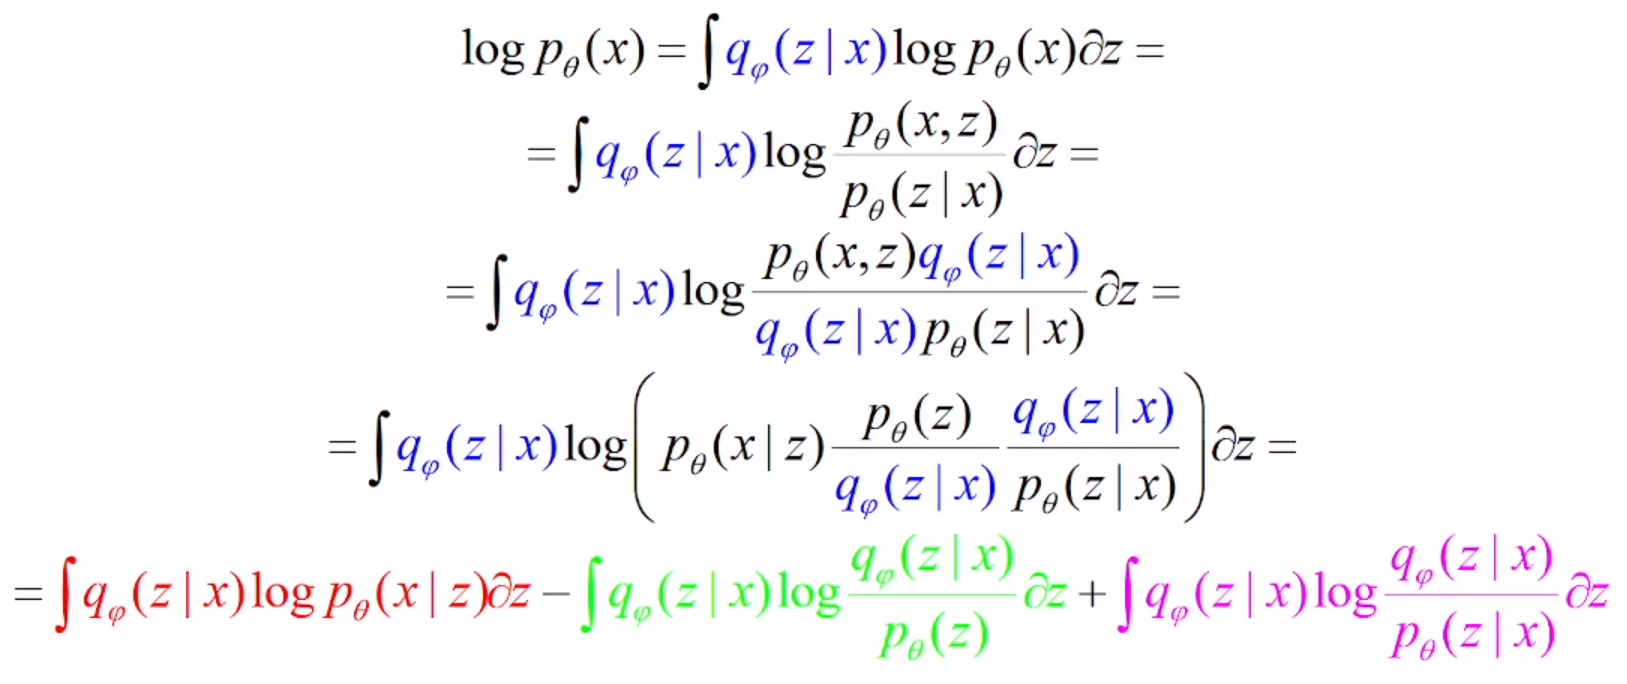

### So, log p<sub>$\theta$</sub>(x) can be divided in 3 parts:

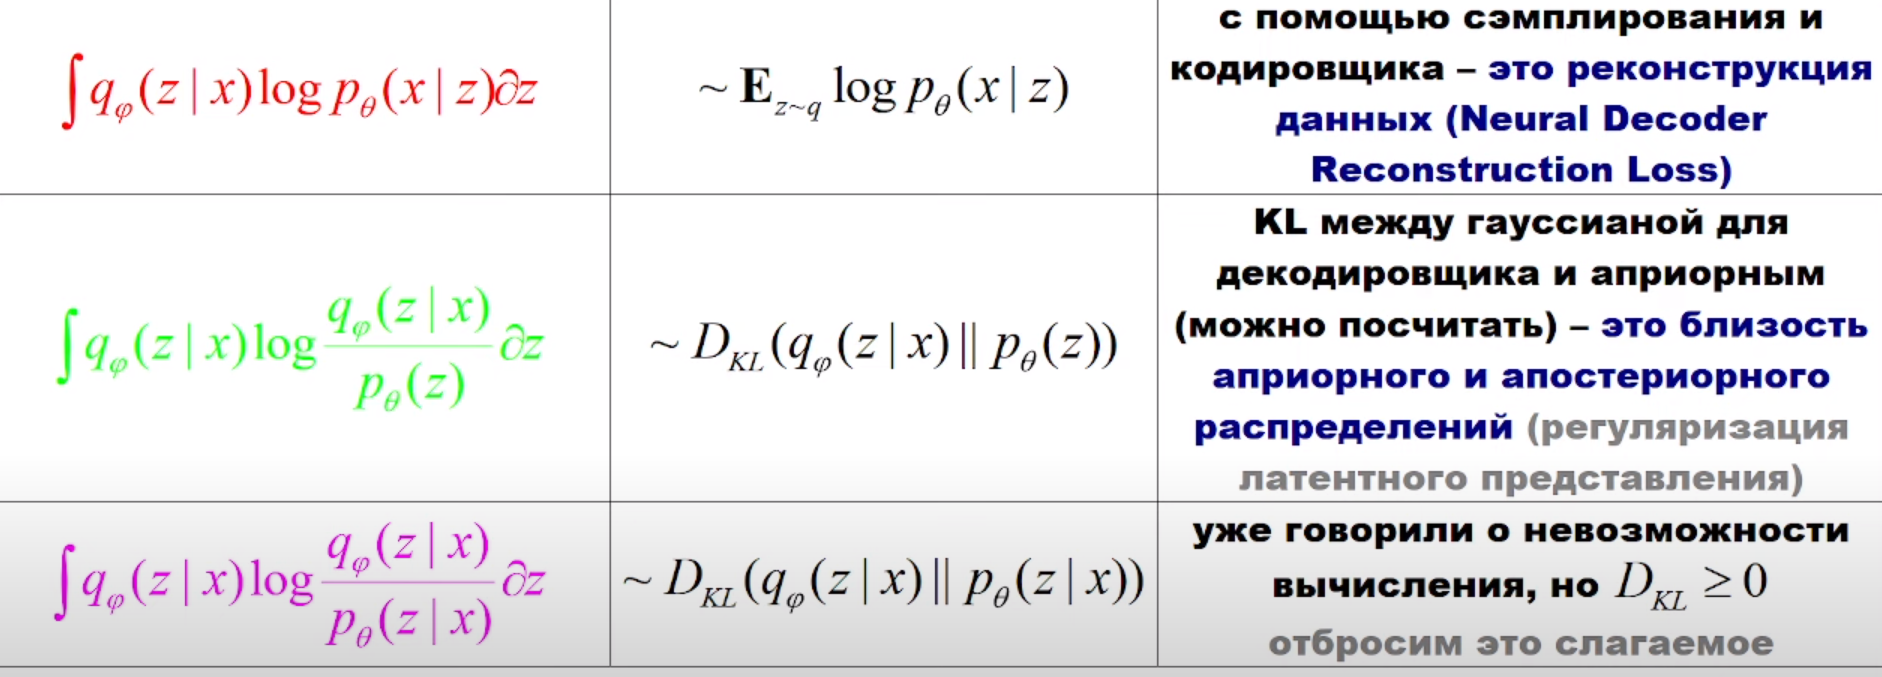

- red part is Neural Decoder Reconstruction Loss, it shows how good data was reconstructed by decoder
- green part is KL divergence between prior distribution of hidden variable z (p<sub>$\theta$</sub>(z)) and posterior distribution of hidden variable z from encoder (q<sub>$\phi$</sub>(z|x)), it can be trained because we want these distributions to be similar; it's used as regulatization
- violet part is impossible to calculate, but considering that KL divergence >= 0, we can drop this part

So we drop one of terms of our log p<sub>$\theta$</sub>(x) and get lower bound for it (Evidence Lower Bound - ELBO):

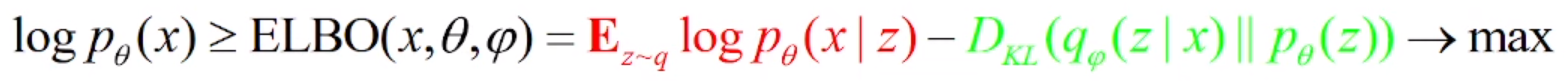

Maximize ELBO -> maximize log p<sub>$\theta$</sub>(x)

# Variational Bayesian Inference

Use q<sub>$\phi$</sub>(z|x) = norm(z | $\mu$<sub>z</sub>(x) (NN must take object x and return parameters of normal distribution that correspond to x, because it's hard to transform image/audio/text to representation with normal distribution), $\sigma$<sub>z</sub>(x) and p<sub>$\theta$</sub>(z) = norm(x | 0, I), because we want latent vectors to be normaly distributed.
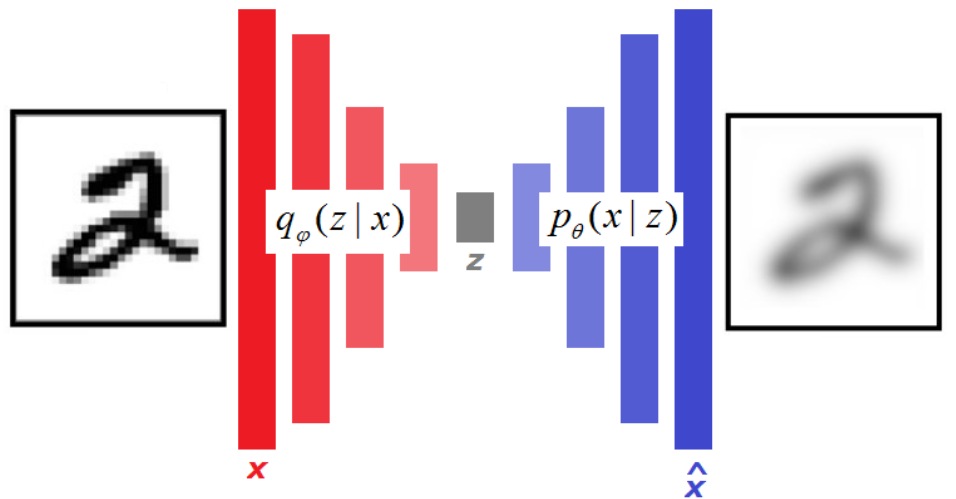

But why do we need q<sub>$\phi$</sub>(z|x) and p<sub>$\theta$</sub>(z) to be normaly distributed? Because this let us to simply calculate KL divergence D<sub>KL</sub> for them by formula of D<sub>KL</sub> for two normal distributions:

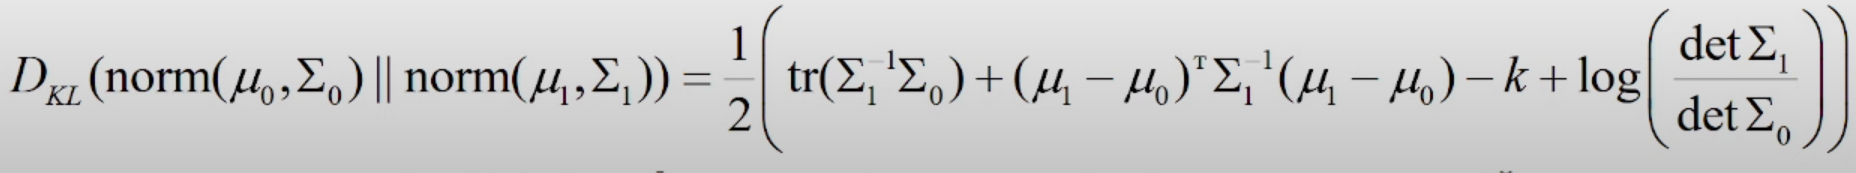

### So what do we have?

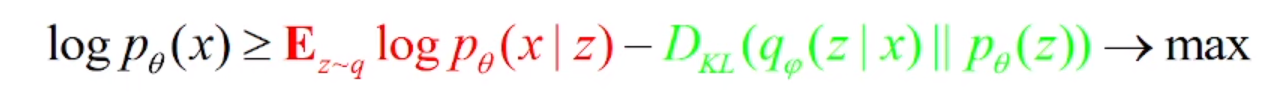

- left part of ELBO is proportional to L2 loss between input object and VAE outuput:

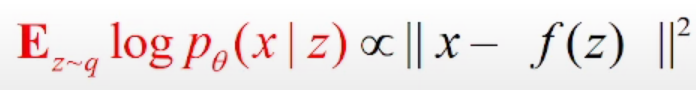

- right part can be easily calculated

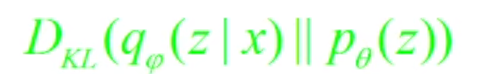

### And our VAE will work like that:

- put image into encoder
- encoder returns vector of means and covariance matrix
- sample point from normal distribution with that vector of means and covariance matrix
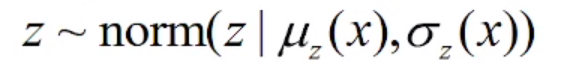
- put this point to decoder
- use 2 losses from ELBO formula: Reconstruction Loss (Loss2) + KL divergence/Regularization (Loss1)

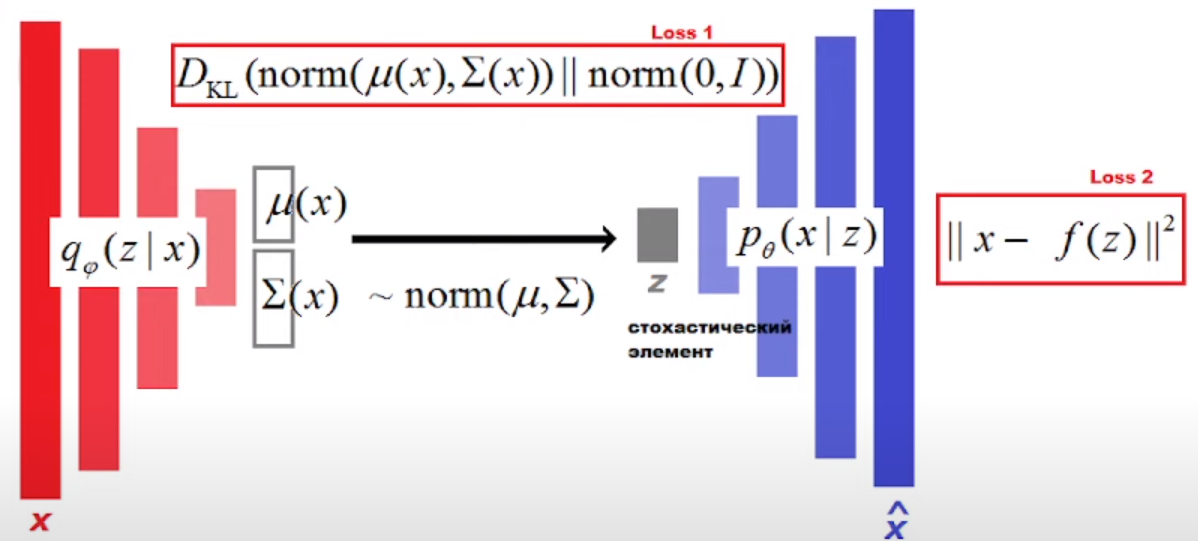

### But how to pass gradient through this net?

We have completely stochastic element:

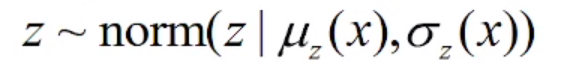

How to pass gradient through it?

# Reparametrization trick

Main idea: separate stochastic and not-stochastic components. To do that we rewrite our normal distribution as:

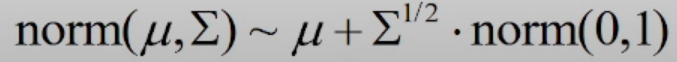

So our distribution now is mean + covariance + stochastic element. Gradients can pass through non-stochastic elements of our rewritten distribution.

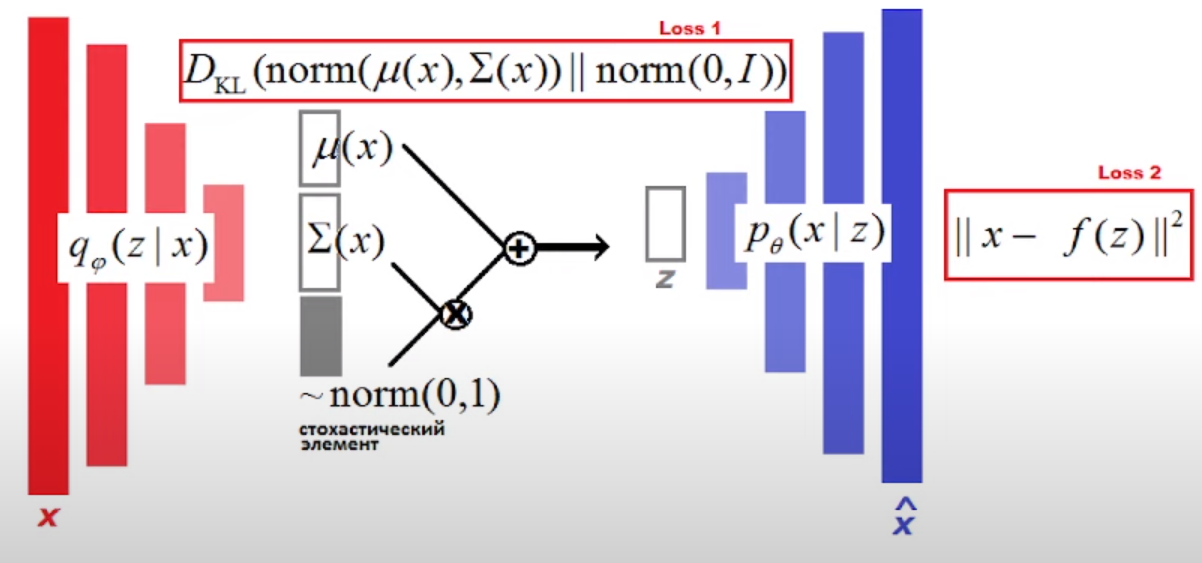

# What happens if we don't use Reconstruction Loss or KL Divergence?

- if only Reconstruction Loss - sparse space, we can't always have correct outupt for any point between any two other point
- if only KL - space is not sparse but all points have been mixed with each other
- if use both - everything is good now

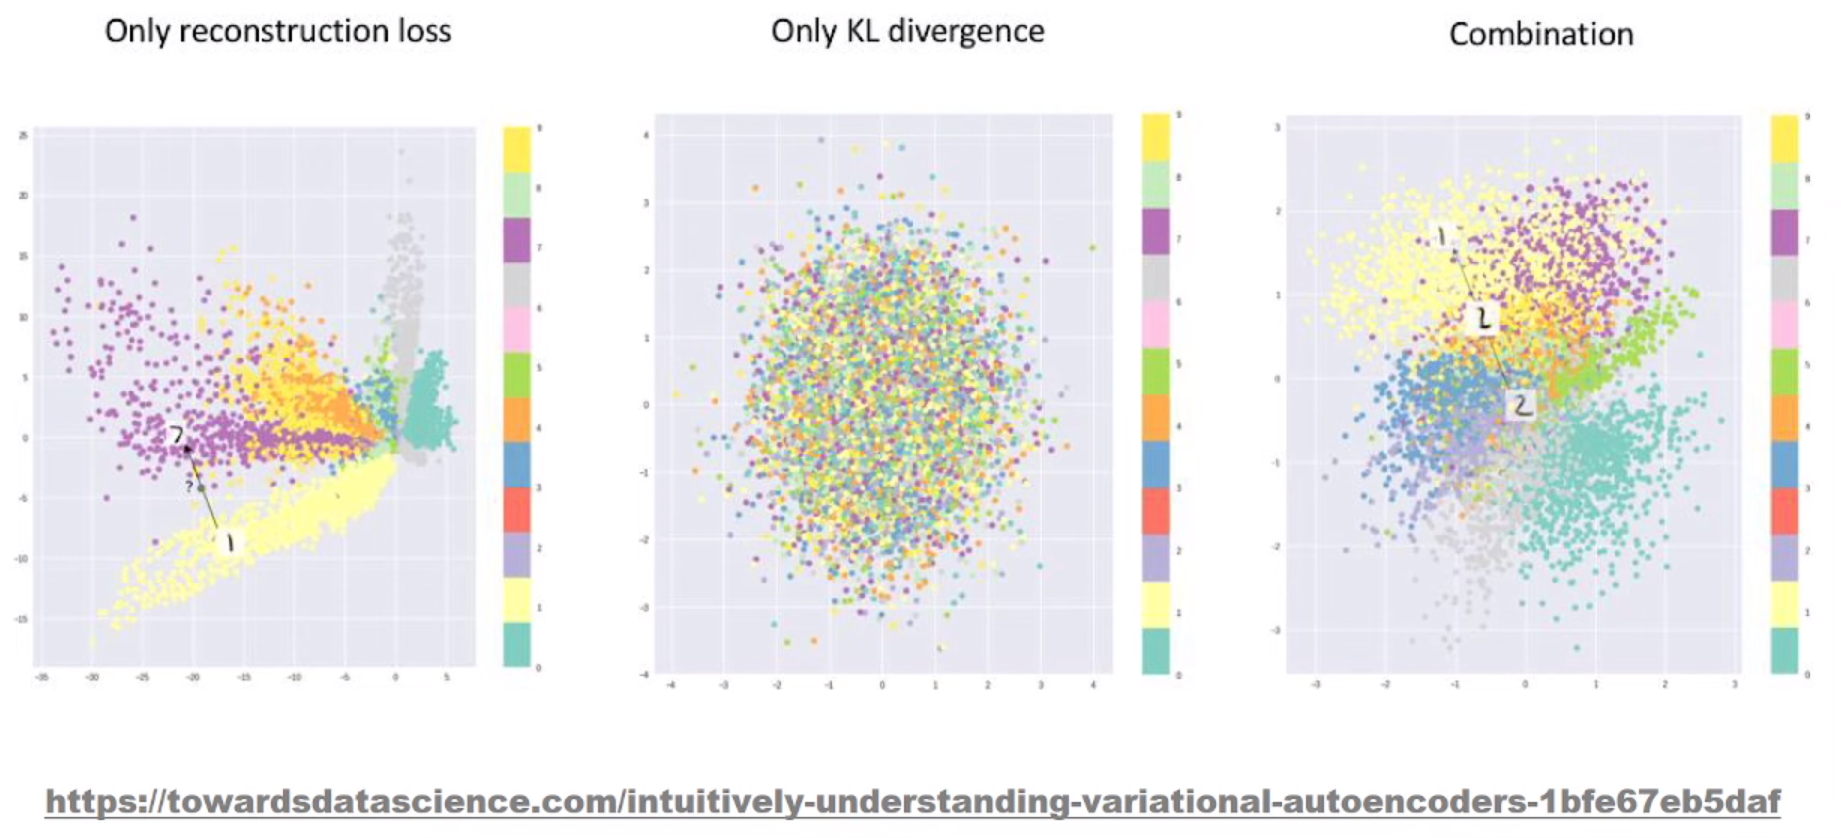

## VAE Latent Space examples

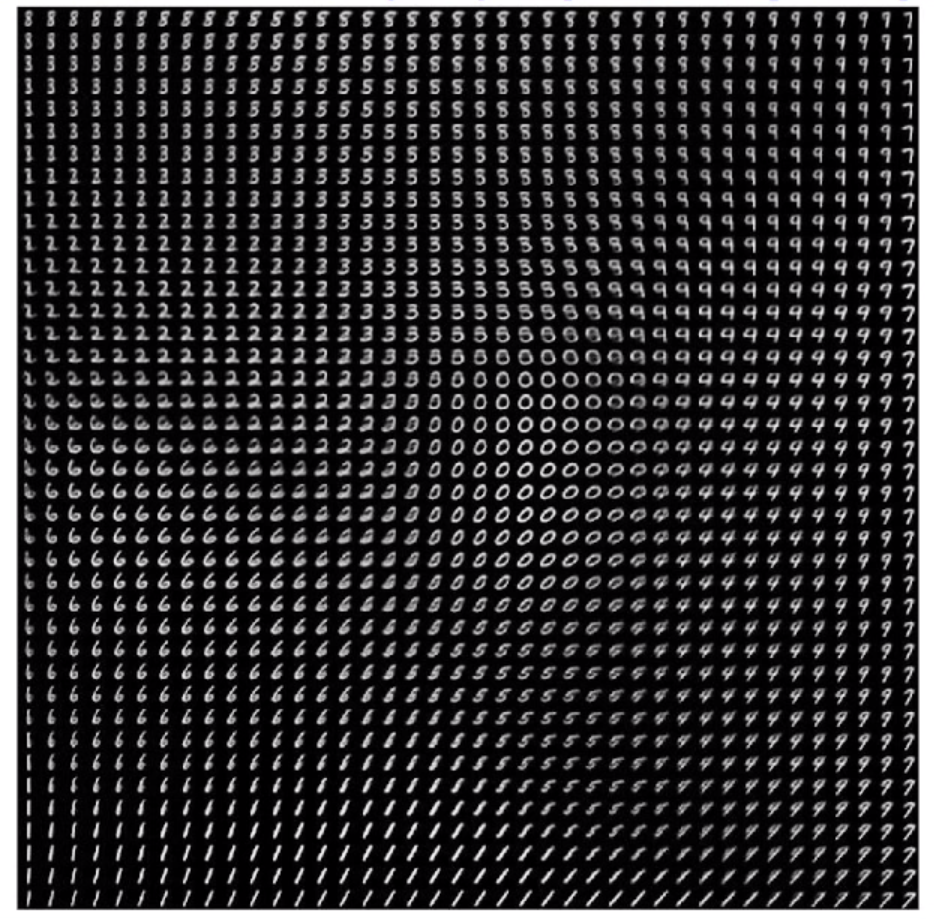

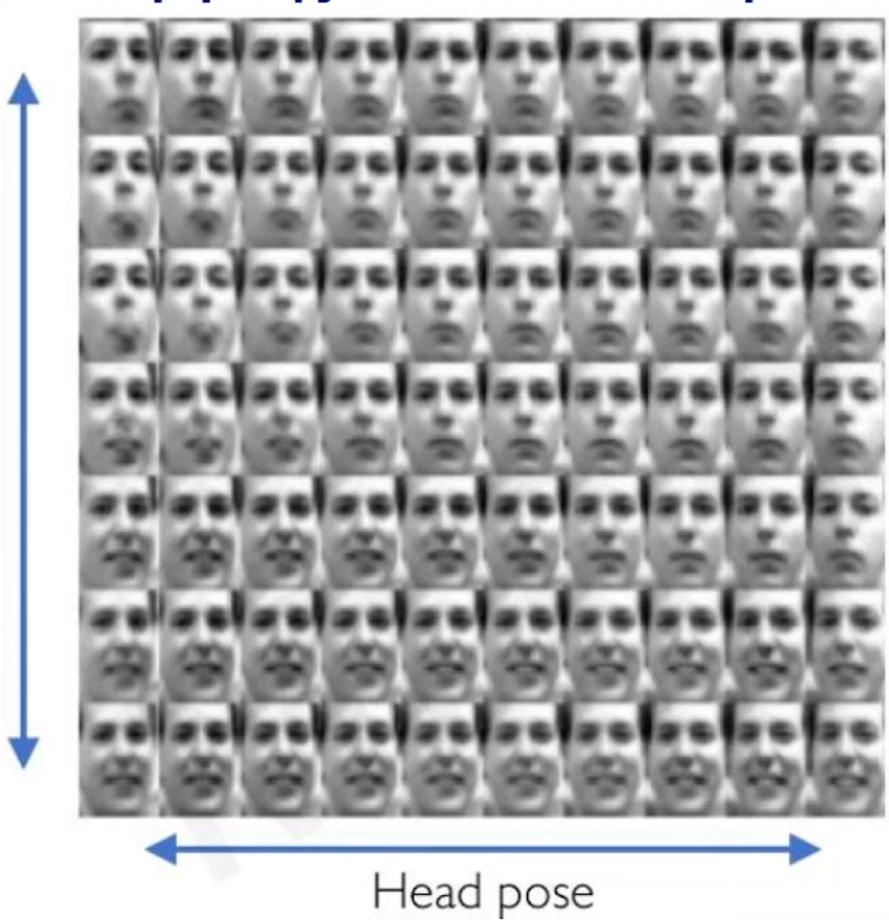

# Common VAE architechture

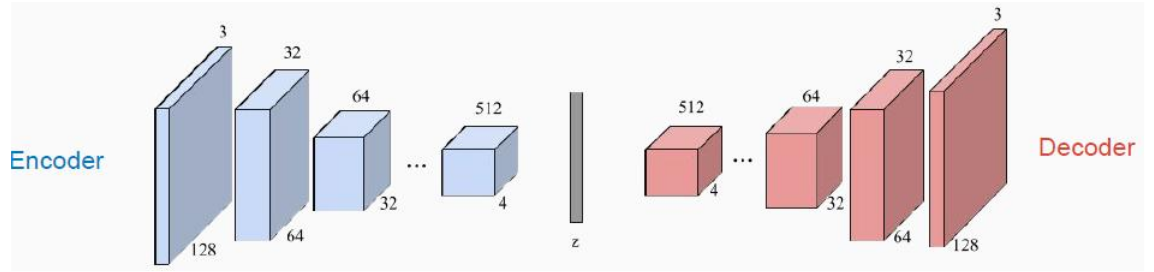

# VAE disadvantages

- density estimation is complex
- generation results aren't good enough
- may be problems with training: KL term often drops to zero during training, decision is to add weight changing for KL term

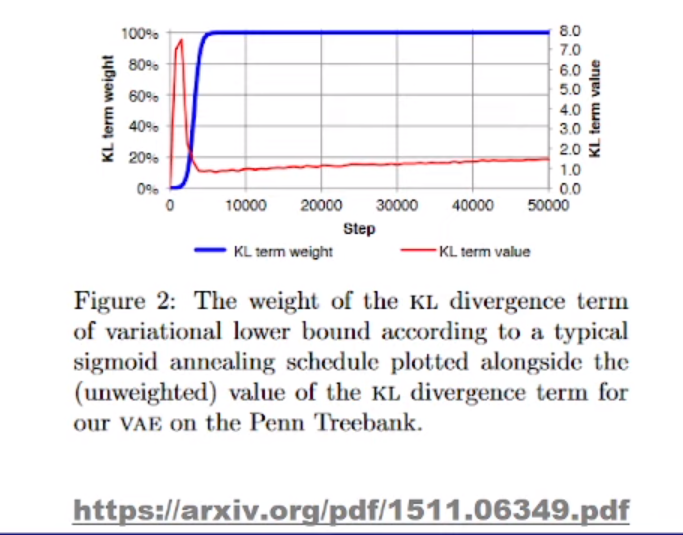

# VAE: Feature Conceptual Loss

Main idea: compare not pixels in original and generated images but features that were obtained after both images were passed through deep CNN:

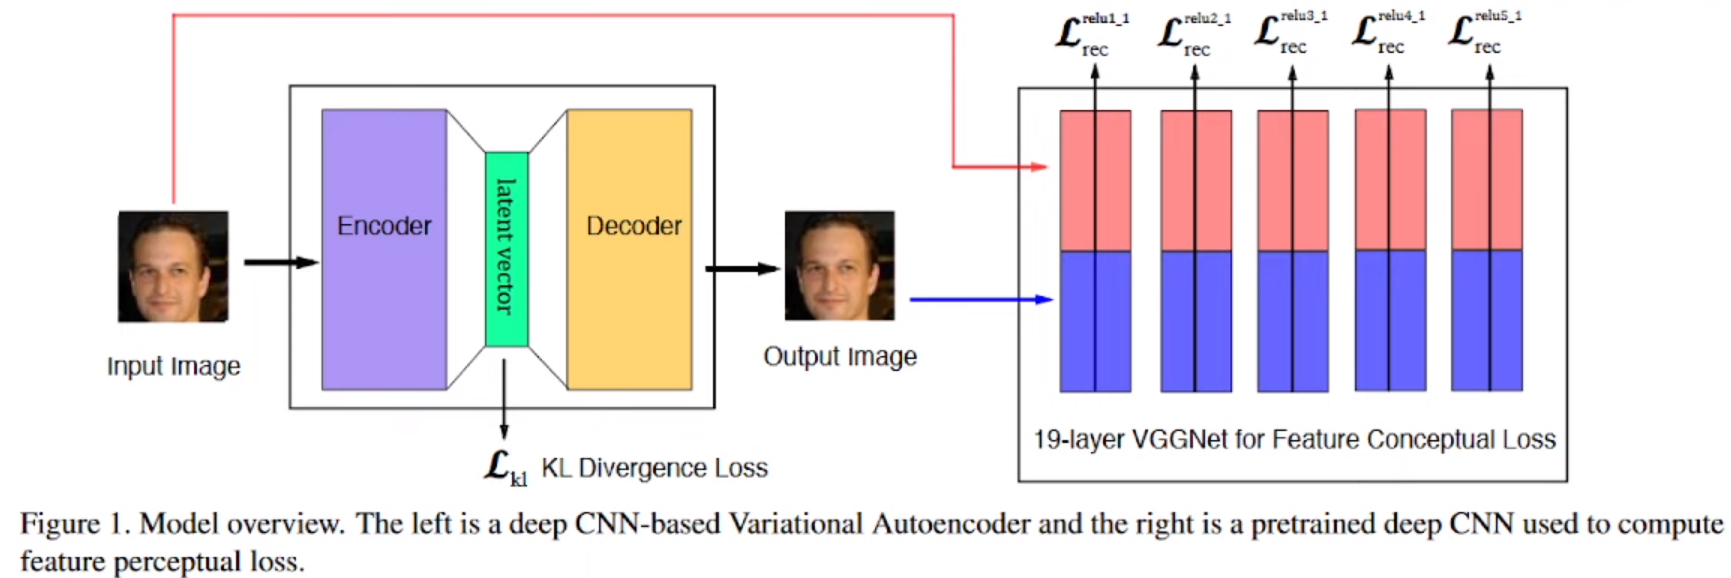

# Conditional VAE (CVAE)

Main idea: what if we want to generate specific object like cat of dog? We then pass some label to encoder and decoder:

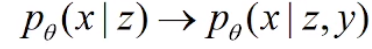

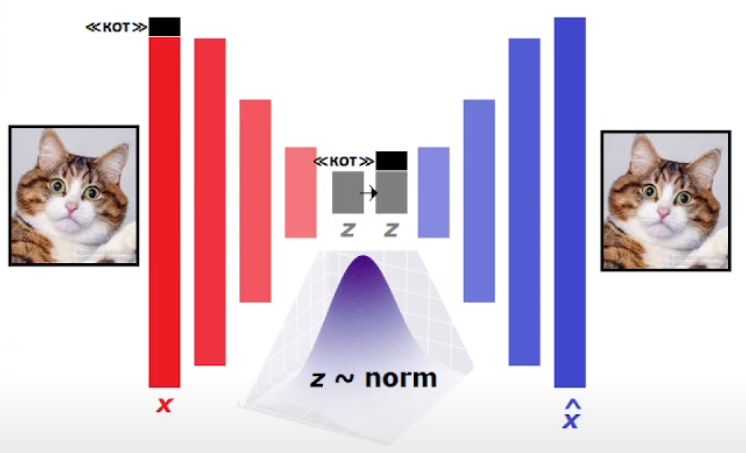